# Time Series Analysis on Bitcoin

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline

In [3]:
sc

In [4]:
from pyspark.sql import HiveContext

In [5]:
hive_context = HiveContext(sc)

In [6]:
btc_price = hive_context.table("cryptocurrency.bitcoin_pr_mod")

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import pandas as pd

In [8]:
btc_price.show()

+----------+-------+-------+-------+-------+------------+---------------+
|      date|   open|   high|    low|  close|      volume|     market_cap|
+----------+-------+-------+-------+-------+------------+---------------+
|2018-04-12|6955.38|7899.23|6806.51|7889.25| 8.9062502E9|118048000000.00|
|2018-04-11|6843.47|6968.32|6817.59|6968.32| 4.6418898E9|116126000000.00|
|2018-04-10|6795.44|6872.41|6704.15|6834.76|4.27275008E9|115306000000.00|
|2018-04-09|7044.32|7178.11|6661.99|6770.73|   4.89406E9|119516000000.00|
|2018-04-08|6919.98|7111.56|6919.98|7023.52|3.65249997E9|117392000000.00|
|2018-04-07|6630.51|7050.54|6630.51|6911.09|3.97661005E9|112467000000.00|
|2018-04-06|6815.96|6857.49| 6575.0|6636.32|3.76681011E9|115601000000.00|
|2018-04-05|6848.65|6933.82| 6644.8|6811.47| 5.6393201E9|116142000000.00|
|2018-04-04|7456.41|7469.88|6803.88|6853.84|     4.936E9|126434000000.00|
|2018-04-03|7102.26|7530.94|7072.49|7456.11| 5.4997002E9|120415000000.00|
|2018-04-02|6844.86|7135.47|6816.58| 7

### Data Preprocessing

In [9]:
#Converting to Pandas data frame
btc_pdf = btc_price.toPandas()
btc_pdf.head(10)

,date,open,high,low,close,volume,market_cap
0,2018-04-12,6955.379883,7899.229980,6806.509766,7889.250000,8.906250e+09,118048000000.00
1,2018-04-11,6843.470215,6968.319824,6817.589844,6968.319824,4.641890e+09,116126000000.00
2,2018-04-10,6795.439941,6872.410156,6704.149902,6834.759766,4.272750e+09,115306000000.00
3,2018-04-09,7044.319824,7178.109863,6661.990234,6770.729980,4.894060e+09,119516000000.00
4,2018-04-08,6919.979980,7111.560059,6919.979980,7023.520020,3.652500e+09,117392000000.00
5,2018-04-07,6630.509766,7050.540039,6630.509766,6911.089844,3.976610e+09,112467000000.00
6,2018-04-06,6815.959961,6857.490234,6575.000000,6636.319824,3.766810e+09,115601000000.00
7,2018-04-05,6848.649902,6933.819824,6644.799805,6811.470215,5.639320e+09,116142000000.00
8,2018-04-04,7456.410156,7469.879883,6803.879883,6853.839844,4.936000e+09,126434000000.00
9,2018-04-03,7102.259766,7530.939941,7072.490234,7456.109863,5.499700e+09,120415000000.00


/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,date,close
0,2013-04-28,134.210007
1,2013-04-29,144.539993
2,2013-04-30,139.000000
3,2013-05-01,116.989998
4,2013-05-02,105.209999


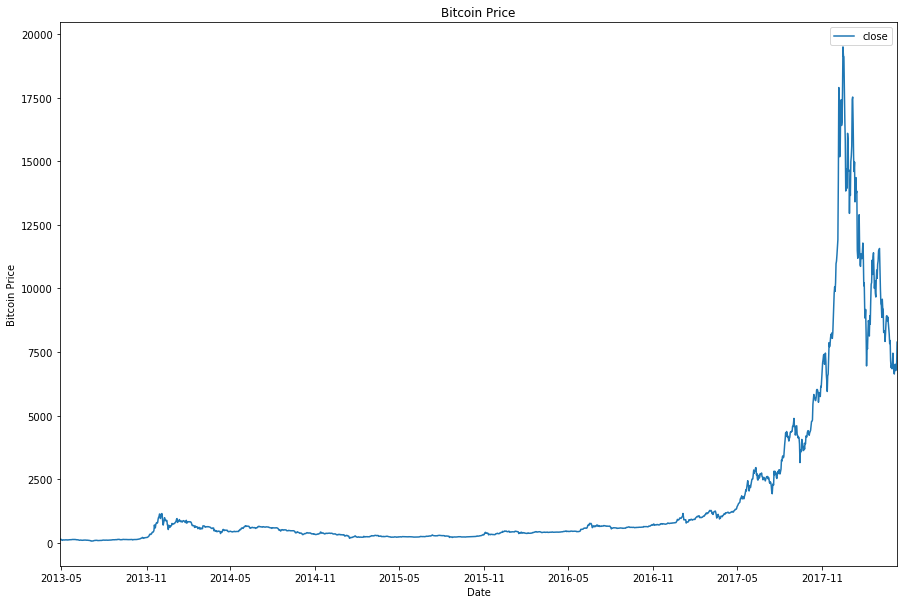

In [10]:
#Bitcoin Closing Price

df = pd.concat([btc_pdf['date'],btc_pdf['close']],axis=1)
df= df.sort('date')
df=df.reset_index(drop=True)
df.head(5)
ax = df.plot(x="date", y="close", kind='line',title='Bitcoin Price',figsize=(15,10))
plt.xlabel("Date")
plt.ylabel("Bitcoin Price")
plt.show()

### Check Stationarity

In [11]:
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [12]:
df['date'] = pd.to_datetime(df['date'])
print df.dtypes
df =df.set_index('date')
df.head(5)
df.index

date     datetime64[ns]
close           float64
dtype: object


,close
date,
2013-04-28,134.210007
2013-04-29,144.539993
2013-04-30,139.000000
2013-05-01,116.989998
2013-05-02,105.209999


DatetimeIndex(['2013-04-28', '2013-04-29', '2013-04-30', '2013-05-01',
               '2013-05-02', '2013-05-03', '2013-05-04', '2013-05-05',
               '2013-05-06', '2013-05-07',
               ...
               '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06',
               '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10',
               '2018-04-11', '2018-04-12'],
              dtype='datetime64[ns]', name=u'date', length=1811, freq=None)

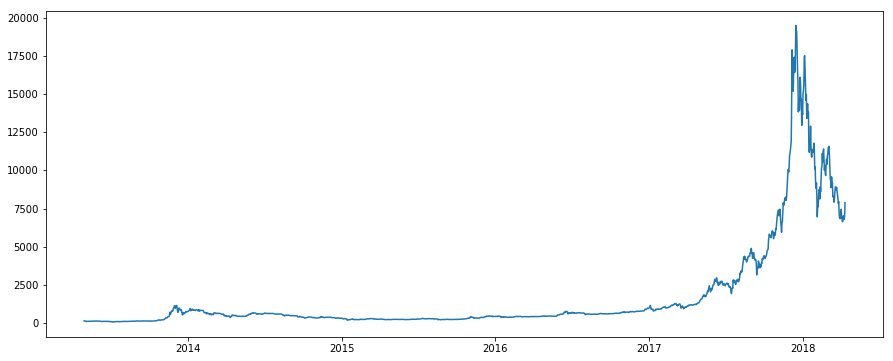

In [13]:
plt.plot(df)

In [14]:
ts = df['close']
mean_ts = np.nanmean(ts, axis=0)
ts[ts== 0] = mean_ts
ts.head(5)

date
2013-04-28    134.210007
2013-04-29    144.539993
2013-04-30    139.000000
2013-05-01    116.989998
2013-05-02    105.209999
Name: close, dtype: float64

In [15]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


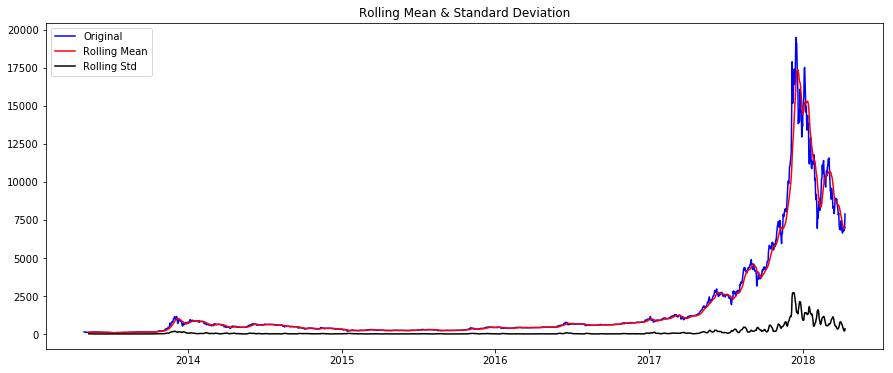

Results of Dickey-Fuller Test:
Test Statistic                   -1.884303
p-value                           0.339481
#Lags Used                       22.000000
Number of Observations Used    1788.000000
Critical Value (5%)              -2.863158
Critical Value (1%)              -3.434013
Critical Value (10%)             -2.567631
dtype: float64


In [16]:
test_stationarity(ts)

## Make Time Series Stationary

### Estimating And Eliminating Trends

In [17]:
ts_log = np.log(ts)
from numpy import inf
ts_log[ts_log == -inf] = 0
mean_ts = np.nanmean(ts_log, axis=0)
ts_log[ts_log == 0] = mean_ts
print ts_log

date
2013-04-28    4.899406
2013-04-29    4.973556
2013-04-30    4.934474
2013-05-01    4.762088
2013-05-02    4.655958
2013-05-03    4.582413
2013-05-04    4.722953
2013-05-05    4.752814
2013-05-06    4.721174
2013-05-07    4.714025
2013-05-08    4.732419
2013-05-09    4.724463
2013-05-10    4.763882
2013-05-11    4.747017
2013-05-12    4.744932
2013-05-13    4.770515
2013-05-14    4.714025
2013-05-15    4.738126
2013-05-16    4.777105
2013-05-17    4.812347
2013-05-18    4.816241
2013-05-19    4.803939
2013-05-20    4.804021
2013-05-21    4.811208
2013-05-22    4.819394
2013-05-23    4.841822
2013-05-24    4.891852
2013-05-25    4.882650
2013-05-26    4.893952
2013-05-27    4.865610
                ...   
2018-03-14    9.020367
2018-03-15    9.024114
2018-03-16    9.028621
2018-03-17    8.976752
2018-03-18    9.014773
2018-03-19    9.063075
2018-03-20    9.095319
2018-03-21    9.097091
2018-03-22    9.074345
2018-03-23    9.091514
2018-03-24    9.067407
2018-03-25    9.047325
2018-0

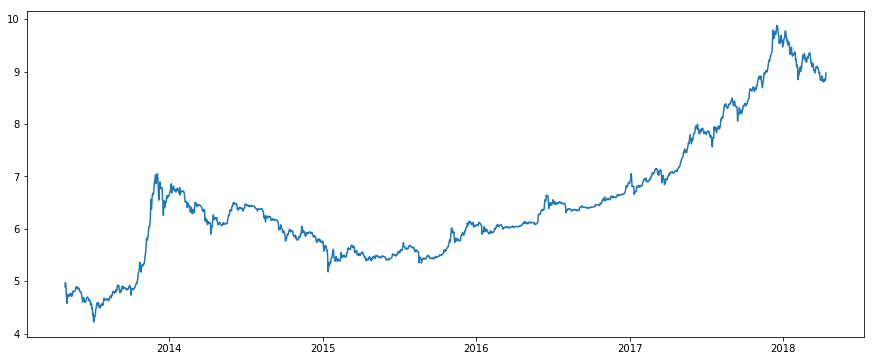

In [18]:
plt.plot(ts_log)

### Moving Average

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':


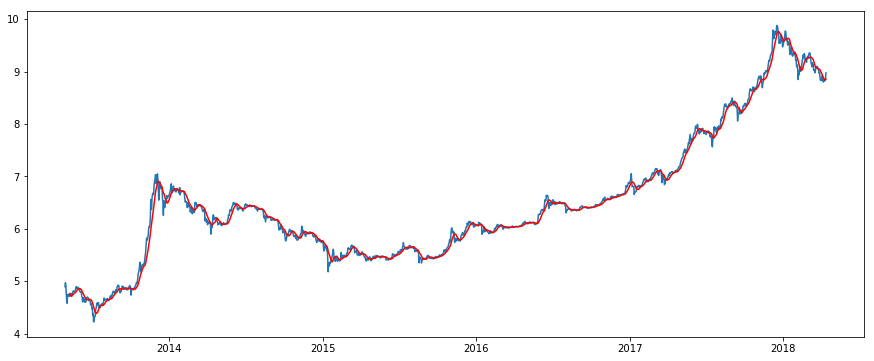

In [19]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(17)

date
2013-04-28         NaN
2013-04-29         NaN
2013-04-30         NaN
2013-05-01         NaN
2013-05-02         NaN
2013-05-03         NaN
2013-05-04         NaN
2013-05-05         NaN
2013-05-06         NaN
2013-05-07         NaN
2013-05-08         NaN
2013-05-09   -0.040182
2013-05-10    0.010530
2013-05-11    0.012543
2013-05-12    0.026254
2013-05-13    0.051135
2013-05-14   -0.010195
Name: close, dtype: float64

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


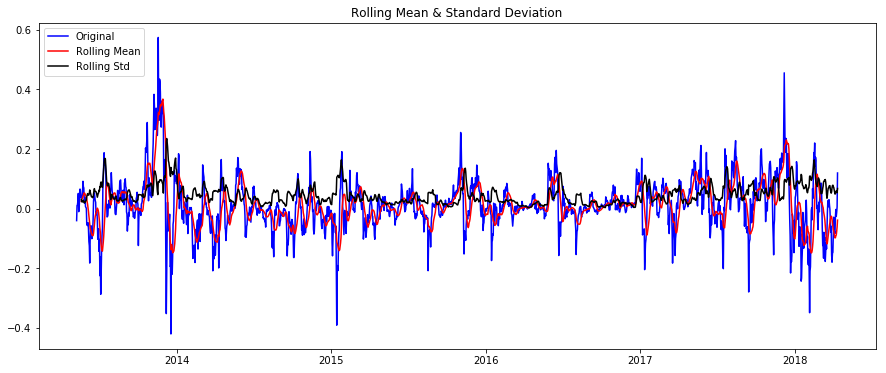

Results of Dickey-Fuller Test:
Test Statistic                -7.502198e+00
p-value                        4.224702e-11
#Lags Used                     2.200000e+01
Number of Observations Used    1.777000e+03
Critical Value (5%)           -2.863168e+00
Critical Value (1%)           -3.434035e+00
Critical Value (10%)          -2.567637e+00
dtype: float64


In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Average

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()
  if __name__ == '__main__':


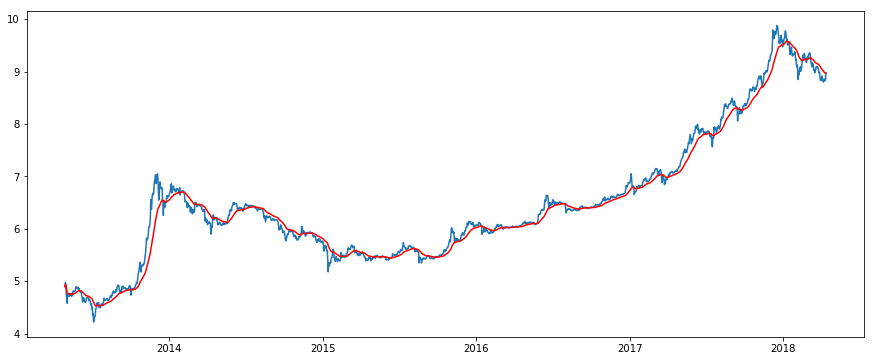

In [22]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


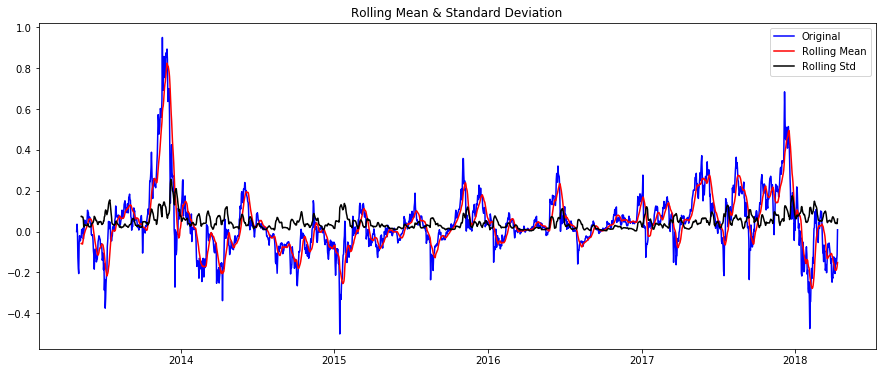

Results of Dickey-Fuller Test:
Test Statistic                   -5.394139
p-value                           0.000003
#Lags Used                       23.000000
Number of Observations Used    1787.000000
Critical Value (5%)              -2.863159
Critical Value (1%)              -3.434015
Critical Value (10%)             -2.567632
dtype: float64


In [23]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing

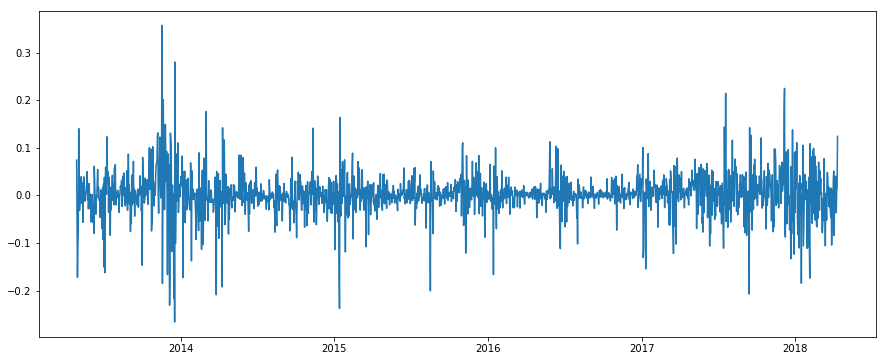

In [24]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


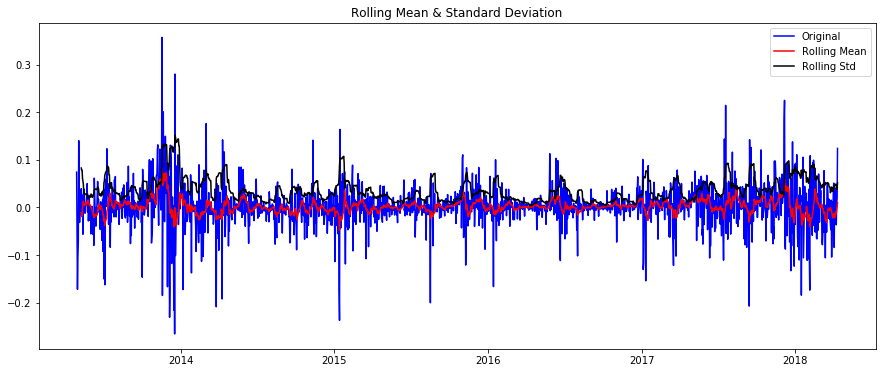

Results of Dickey-Fuller Test:
Test Statistic                -7.630639e+00
p-value                        2.013228e-11
#Lags Used                     2.200000e+01
Number of Observations Used    1.787000e+03
Critical Value (5%)           -2.863159e+00
Critical Value (1%)           -3.434015e+00
Critical Value (10%)          -2.567632e+00
dtype: float64


In [25]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing

/home/cloudera/anaconda2/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


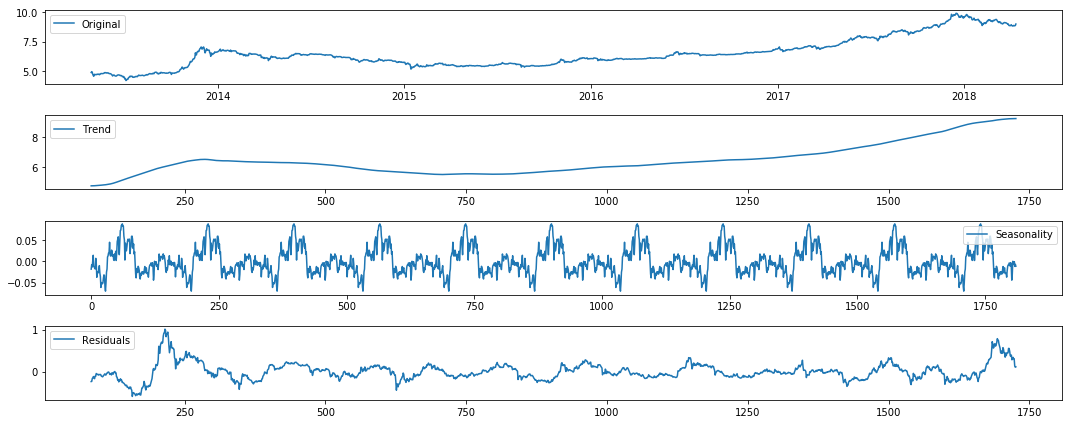

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log.values, freq=168)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/home/cloudera/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


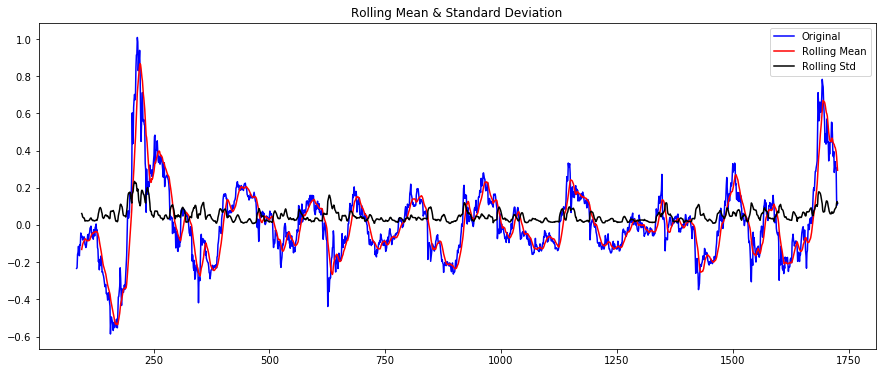

Results of Dickey-Fuller Test:
Test Statistic                   -5.525752
p-value                           0.000002
#Lags Used                       23.000000
Number of Observations Used    1619.000000
Critical Value (5%)              -2.863327
Critical Value (1%)              -3.434396
Critical Value (10%)             -2.567721
dtype: float64


In [27]:
ts_log_decompose = pd.DataFrame(residual)
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose.iloc[:,0])

## Forecasting 

In [28]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [29]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

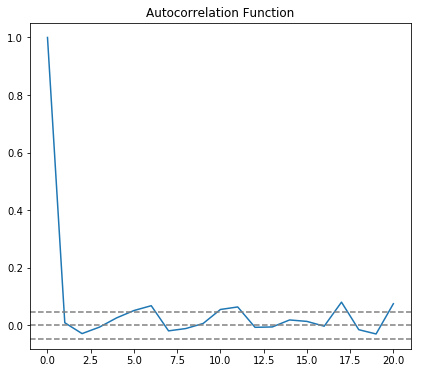

In [30]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

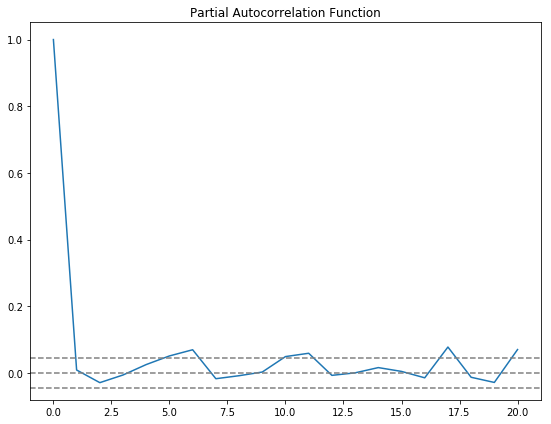

In [31]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [32]:
from statsmodels.tsa.arima_model import ARIMA

### AR Model

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1810
Model:                 ARIMA(2, 1, 0)   Log Likelihood                3042.409
Method:                       css-mle   S.D. of innovations              0.045
Date:                Mon, 23 Apr 2018   AIC                          -6076.818
Time:                        00:24:16   BIC                          -6054.814
Sample:                    04-29-2013   HQIC                         -6068.698
                         - 04-12-2018                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0022      0.001      2.166      0.030         0.000     0.004
ar.L1.D.close     0.0090      0.024      0.383      0.702        -0.037     0.055
ar.L2.D.close    -0.0292      0.024     

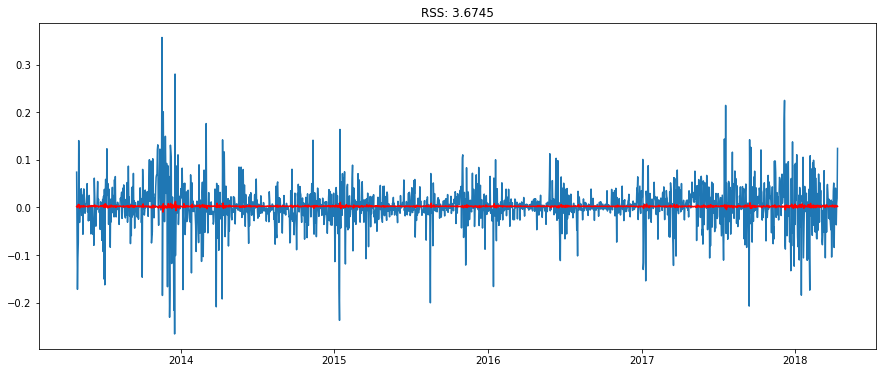

In [36]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
print results_AR.summary()
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1810
Model:                 ARIMA(0, 1, 2)   Log Likelihood                3042.365
Method:                       css-mle   S.D. of innovations              0.045
Date:                Mon, 23 Apr 2018   AIC                          -6076.730
Time:                        00:24:27   BIC                          -6054.726
Sample:                    04-29-2013   HQIC                         -6068.610
                         - 04-12-2018                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0022      0.001      2.164      0.031         0.000     0.004
ma.L1.D.close     0.0087      0.024      0.371      0.710        -0.037     0.055
ma.L2.D.close    -0.0275      0.023     

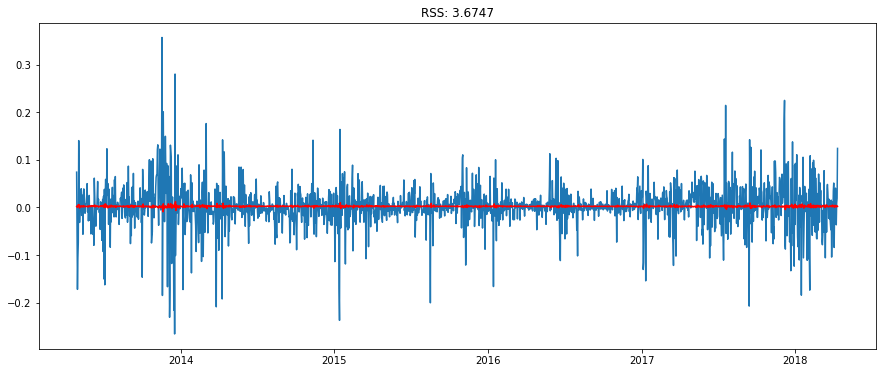

In [37]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
print results_MA.summary()

### Combined Model

/home/cloudera/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1810
Model:                 ARIMA(2, 1, 2)   Log Likelihood                3054.817
Method:                       css-mle   S.D. of innovations              0.045
Date:                Mon, 23 Apr 2018   AIC                          -6097.635
Time:                        00:24:49   BIC                          -6064.628
Sample:                    04-29-2013   HQIC                         -6085.454
                         - 04-12-2018                                         
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.0022      0.001      2.173      0.030         0.000     0.004
ar.L1.D.close     0.7422      0.015     49.833      0.000         0.713     0.771
ar.L2.D.close    -0.9755      0.014    -

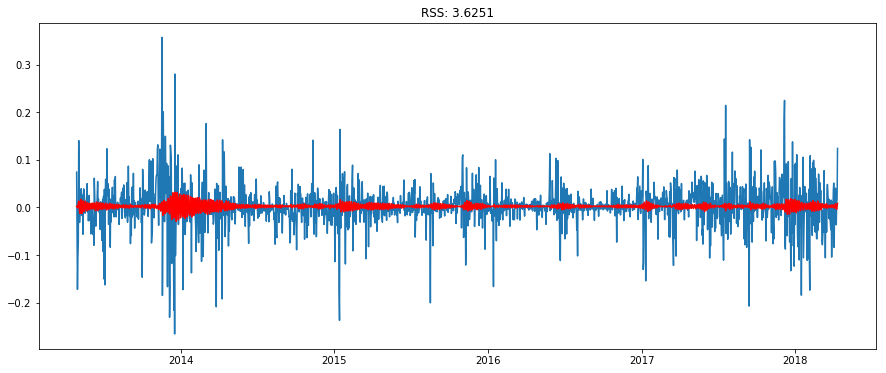

In [38]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
print results_ARIMA.summary()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Taking it back to original scale

In [39]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

date
2013-04-29    0.002245
2013-04-30    0.002984
2013-05-01   -0.000642
2013-05-02   -0.000501
2013-05-03    0.008932
dtype: float64


In [40]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

date
2013-04-29    0.002245
2013-04-30    0.005229
2013-05-01    0.004588
2013-05-02    0.004086
2013-05-03    0.013018
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

date
2013-04-28    4.899406
2013-04-29    4.901650
2013-04-30    4.904635
2013-05-01    4.903993
2013-05-02    4.903492
dtype: float64

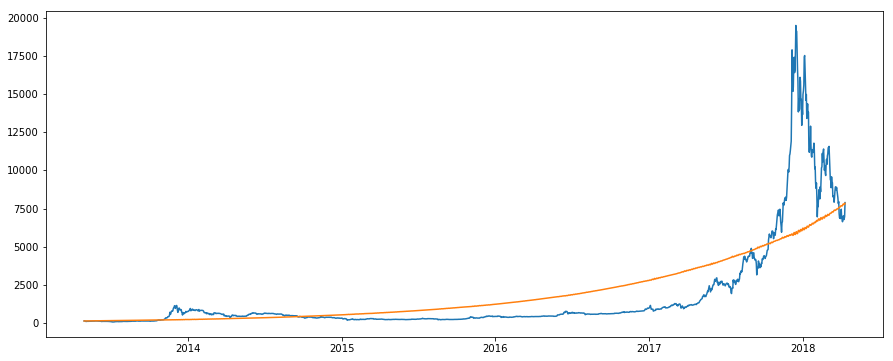

In [42]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)

### Prediction Evaluation

[1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 

(array([ 817.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  994.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

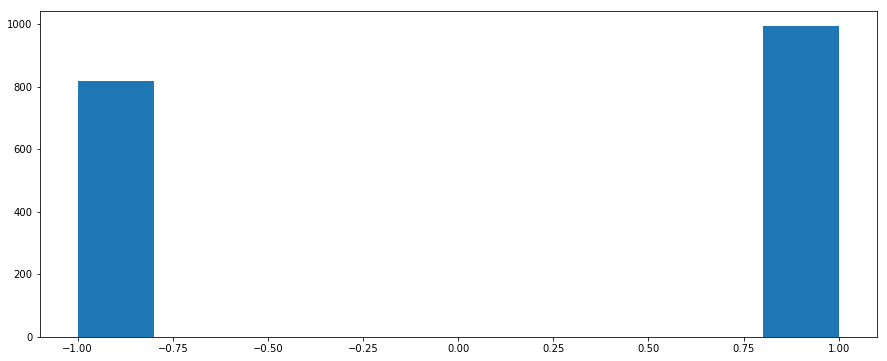

In [43]:
#increase or decrease prediction
btc_tgt = ts

btc_diff=[]
btc_diff.append(1)
for i in xrange(1,len(btc_tgt)):
    v = btc_tgt.iloc[i] - btc_tgt.iloc[i-1]
    if v < 0:
        btc_diff.append(-1)
    else:
        btc_diff.append(1)

print(btc_diff)
print(len(btc_diff))

plt.hist(btc_diff)
plt.show()

[1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, 1

(array([  494.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1317.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

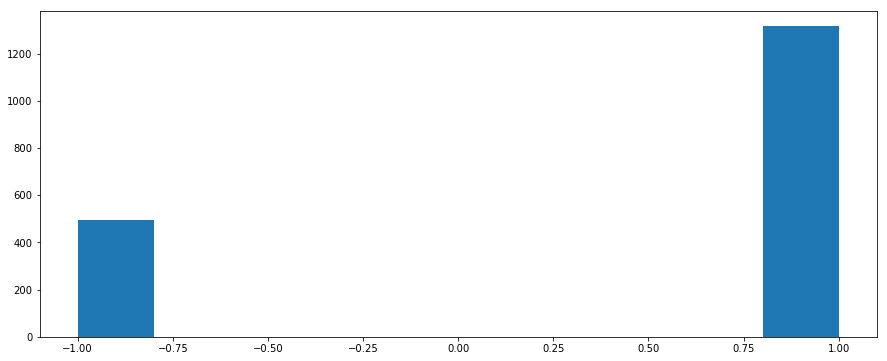

In [44]:
btc_pred = predictions_ARIMA

btc_dpred=[]
btc_dpred.append(1)
for i in xrange(1,len(btc_pred)):
    v = btc_pred.iloc[i] - btc_pred.iloc[i-1]
    if v < 0:
        btc_dpred.append(-1)
    else:
        btc_dpred.append(1)

print(btc_dpred)
print(len(btc_dpred))

plt.hist(btc_dpred)
plt.show()

[[236 581]
 [258 736]]
0.536720044174
0.514652172521
0.518289327665
0.498492105379


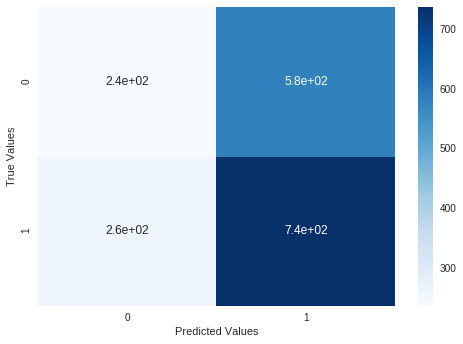

precision: [ 0.47773279  0.55884586]
recall: [ 0.28886169  0.74044266]
fscore: [ 0.36003051  0.6369537 ]
support: [817 994]


In [45]:
#Checking Accuracy and other metrics
from sklearn import metrics
import seaborn as sns

#Evaluation Metrics
#Confusion Matrix, accuracy, recall, precision and f1-score
print(metrics.confusion_matrix(btc_diff, btc_dpred))
print(metrics.accuracy_score(btc_diff, btc_dpred))
print(metrics.recall_score(btc_diff, btc_dpred,average='macro'))
print(metrics.precision_score(btc_diff, btc_dpred,average='macro'))
print(metrics.f1_score(btc_diff, btc_dpred,average='macro'))

ht = sns.heatmap(pd.DataFrame(metrics.confusion_matrix(btc_diff, btc_dpred)), annot=True, cmap="Blues")
ht.set(xlabel='Predicted Values', ylabel='True Values')
plt.show()

#Another way to view these metrics for every class label
precision, recall, fscore, support = metrics.precision_recall_fscore_support(btc_diff, btc_dpred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))